In [1]:
# Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [8]:
# Reading the 'pollution_india_2010' data set
data = pd.read_csv('pollution_india_2010.csv', na_values = 'Null')
data.head()

,City,NO2,PM10,SO2,State
0,Chitoor,9.0,39.0,4.0,Andhra Pradesh
1,Guntur,11.0,81.0,2.0,Andhra Pradesh
2,Hydrabad,24.0,79.0,5.0,Andhra Pradesh
3,Kothagudem,11.0,62.0,2.0,Andhra Pradesh
4,Kurnool,9.0,85.0,4.0,Andhra Pradesh


In [10]:
# Checking the shape of the data frame
data.shape

(181, 5)

In [9]:
# Checking for missing values
data.isnull().sum()

City     0
NO2      4
PM10     1
SO2      5
State    0
dtype: int64

In [11]:
# Deleting those missing values
data = data.dropna()

In [12]:
# Checking the shape of the data frame
data.shape # So, missing entries are eliminated

(175, 5)

In [13]:
# Check the data types of the columns of the data frame
data.dtypes

City      object
NO2      float64
PM10     float64
SO2      float64
State     object
dtype: object

In [14]:
# Get the column names of the data frame
data.columns

Index(['City', 'NO2', 'PM10', 'SO2', 'State'], dtype='object')

In [24]:
# Select 'N02', 'PM10' & 'S02' as measures of pollution
# We group by the data by state names
data_pollution = data.groupby('State', as_index = False)[['NO2', 'PM10', 'SO2']].sum()
data_pollution.head() # as_index = False in needed otherwise we can't drop the 'State' column

,State,NO2,PM10,SO2
0,Andhra Pradesh,183.0,893.0,60.0
1,Assam,177.0,834.0,74.0
2,Bihar,40.0,181.0,7.0
3,Chandigarh,16.0,92.0,2.0
4,Chattisgarh,86.0,502.0,37.0


In [26]:
# Now we need to scale the data
# Scaling only works for numerical data
# So, we drop the 'state' column from data and name it data_num
data_num = data_pollution.drop('State', axis = 1)
data_num.head()

# Defining the Z transformation scaling function as scale
def scale(x):
    return (x - np.mean(x))/np.std(x)

# Applying the Scale function on data_num to get scaled data
data_scaled = data_num.apply(scale, axis = 1)
data_scaled.head()

,NO2,PM10,SO2
0,-0.532950,1.400923,-0.867973
1,-0.548580,1.403137,-0.854557
2,-0.477083,1.391492,-0.914409
3,-0.522653,1.399362,-0.876709
4,-0.586407,1.407697,-0.821290


In [30]:
# Importing packages for Heirarchical Clustering algorithm
from scipy.cluster.hierarchy import dendrogram, linkage

# Converting the data_scaled data frame to an array
data_scaled = np.array(data_scaled)
data_scaled[0:5]

# Creating Herrarchical Clustering model
z = linkage(data_scaled, method = 'ward')

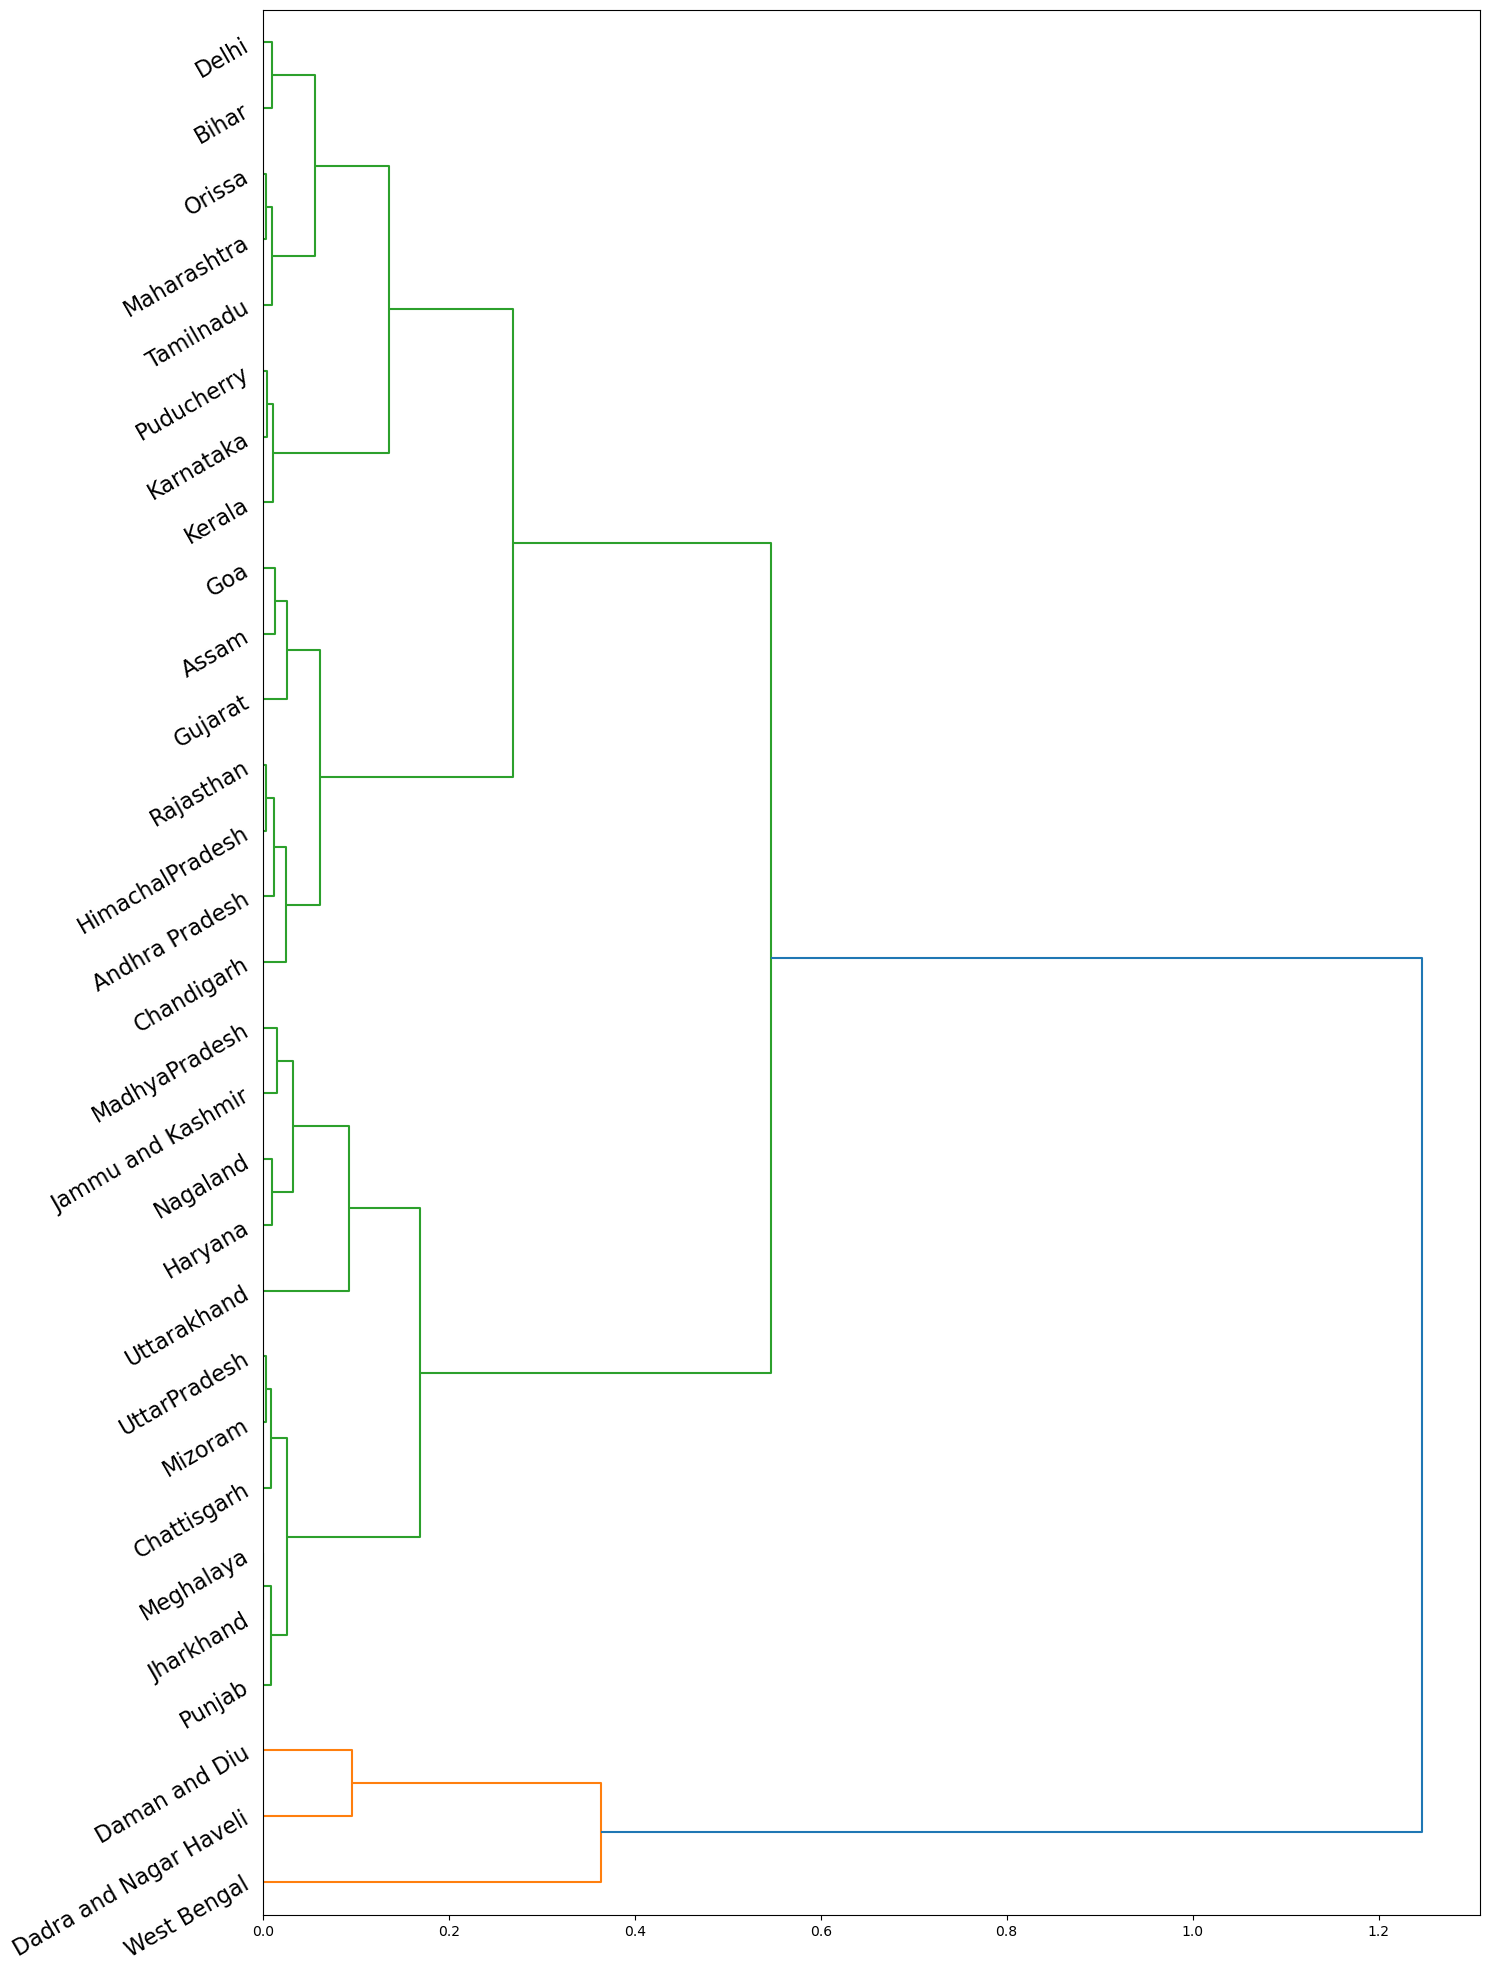

In [33]:
# Creating the Dendrogram to observe the Hierarchical Clustering we made
fig,ax = plt.subplots(figsize = (15,20))
ax = dendrogram(z, orientation = 'right', labels = np.array(data_pollution['State']), 
                leaf_rotation = 30, leaf_font_size = 16)
plt.tight_layout()
plt.show()